In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1. Tampilkan menggunakan barh jumlah gender perempuan dan laki laki berdasarkan nama city yang diinputkan user
df = pd.read_csv("supermarket.csv")
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [3]:
# jumlah female per daerah 
sort_f = df[df['Gender'] == 'Female']
sorted_f = sort_f.groupby('City')[['Gender']].count().reset_index()

In [4]:
# jumlah male per daerah 
sort_m = df[df['Gender'] == 'Male']
sorted_m = sort_m.groupby('City')[['Gender']].count().reset_index()

<AxesSubplot:ylabel='City'>

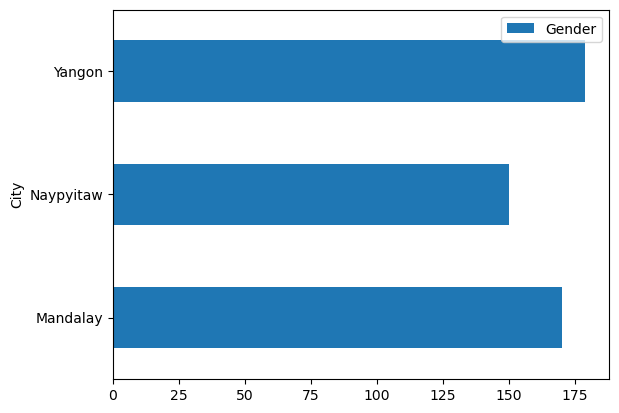

In [5]:
# membuat bar 
# sorted male 
sorted_m.plot(x="City", y="Gender", kind="barh")

<AxesSubplot:ylabel='City'>

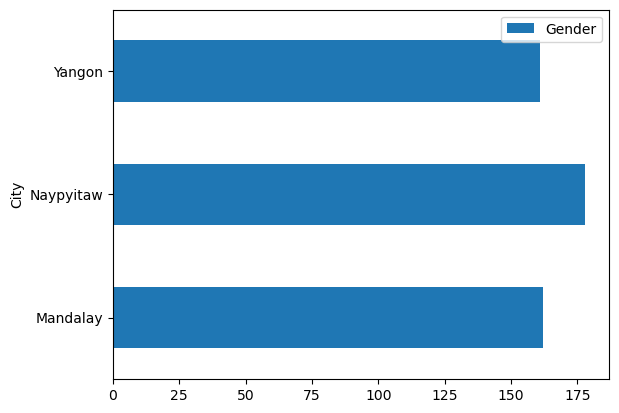

In [6]:
# membuat bar 
# sorted female 

sorted_f.plot(x="City", y="Gender", kind="barh")
#sorted_f.title("gender perempuan di city masing2")

In [7]:
# 2. Tampilkan tiap branch mempunyai berapa gender perempuan dan laki laki
# tampilkan grafik untuk setiap cabang, dimana terdapat perbandingan 
# jumlah gender laki-laki dan perempuan

In [8]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [9]:
df['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [10]:
# sort branches 
branch_a = df[df['Branch'] == 'A']
branch_b = df[df['Branch'] == 'B']
branch_c = df[df['Branch'] == 'C']

<AxesSubplot:ylabel='Gender'>

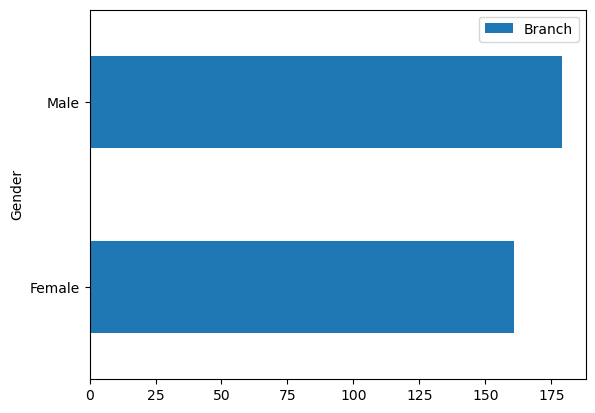

In [11]:
# sort gender of each branch 
#branch_a['Gender'].unique()

#branch A
new = branch_a.groupby('Gender')['Branch'].count().reset_index()
new.plot(y="Branch", x="Gender", kind="barh")

<AxesSubplot:ylabel='Gender'>

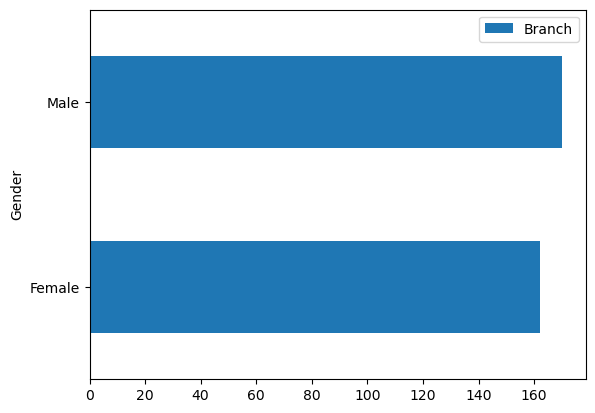

In [12]:
# branch B 
new_2 = branch_b.groupby('Gender')['Branch'].count().reset_index()
new_2.plot(y="Branch", x="Gender", kind="barh")

<AxesSubplot:ylabel='Gender'>

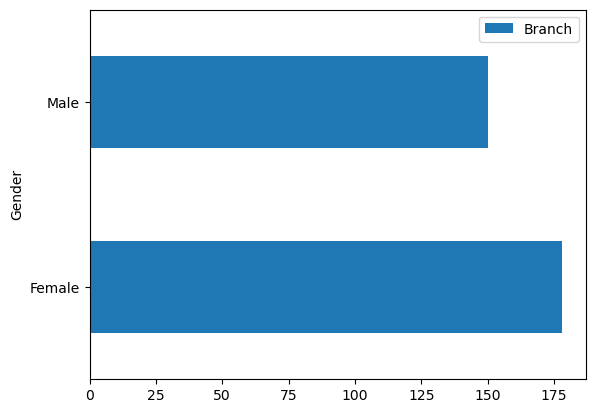

In [13]:
# branch C 
new_3 = branch_c.groupby('Gender')['Branch'].count().reset_index()
new_3.plot(y="Branch", x="Gender", kind="barh")

<AxesSubplot:ylabel='Branch'>

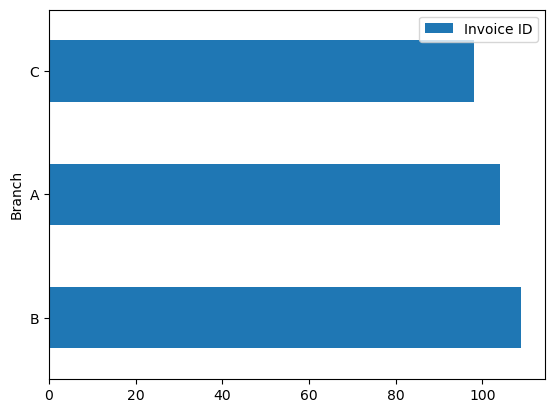

In [14]:
# 3. Tampilkan penggunaan credit card dari cabang mana saja, urutkan dari cabang yang penggunaanya terbanyak

# sort credit card users
sorted_cc = df[df['Payment'] == 'Credit card']

#find all the branches using cc
sorted_cc['Branch'].unique()

#find value count branch a using cc
new = sorted_cc.groupby('Branch')['Invoice ID'].count().reset_index()

#sort values ascending and print barplot
news = new.sort_values(by='Invoice ID', ascending=False)
news.plot(y="Invoice ID", x="Branch", kind="barh")

<AxesSubplot:ylabel='Branch'>

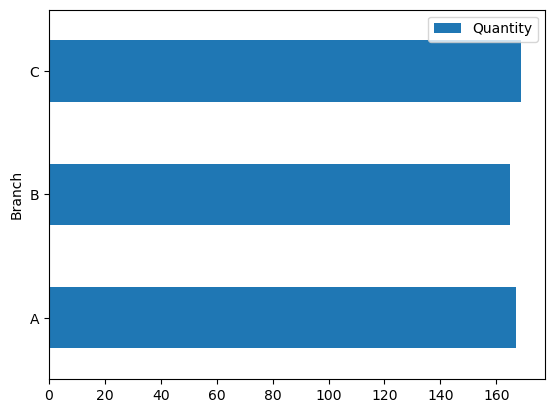

In [15]:
# 4. Tampilkan tipe customer member setiap cabang sudah total belanja berapa banyak tampilkan dari nilai terkecil ke terbesar
#df['Customer type'].unique()

# sort customer member 
is_member = df[df['Customer type'] == 'Member']

# sort per branch of each customer member
#ba = is_member[is_member['Branch'] == 'A']
#bb = is_member[is_member['Branch'] == 'B']
#bc = is_member[is_member['Branch'] == 'C']
#print(ba, bb, bc)

# sort using groupby 
new_sort = is_member.groupby('Branch')[['Quantity']].count().reset_index()
new_sort.plot(x="Branch", y="Quantity", kind="barh")

<AxesSubplot:ylabel='Payment'>

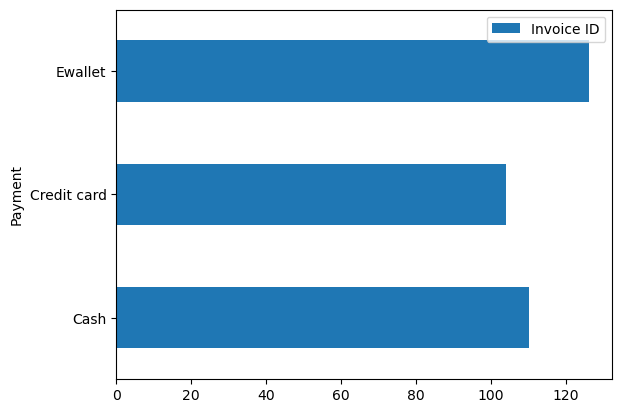

In [16]:
# 5. Tampilkan jumlah status penggunaan payment untuk setiap cabang, setiap cabang tampilkan dalam tiap grafik
df.head(3)

# sort per branch 
ba = df[df['Branch'] == 'A']
bb = df[df['Branch'] == 'B']
bc = df[df['Branch'] == 'C']

# sort each branch using groupby to get every payment type
sort_ba = ba.groupby('Payment')[['Invoice ID']].count().reset_index()
sort_bb = bb.groupby('Payment')[['Invoice ID']].count().reset_index()
sort_bc = bc.groupby('Payment')[['Invoice ID']].count().reset_index()

# graph each barplot for each branch 
# branch a
sort_ba.plot(x="Payment", y="Invoice ID", kind="barh")

<AxesSubplot:ylabel='Payment'>

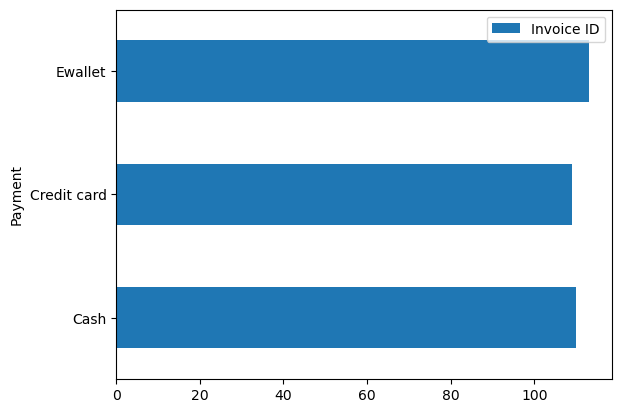

In [17]:
# branch b 
sort_bb.plot(x="Payment", y="Invoice ID", kind="barh")

<AxesSubplot:ylabel='Payment'>

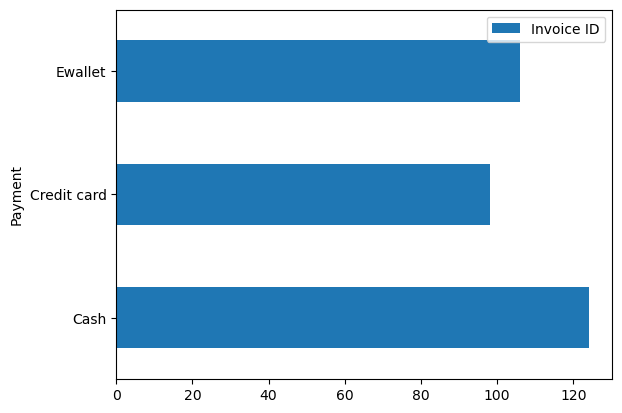

In [18]:
# branch c 
sort_bc.plot(x="Payment", y="Invoice ID", kind="barh")

<AxesSubplot:ylabel='Product line'>

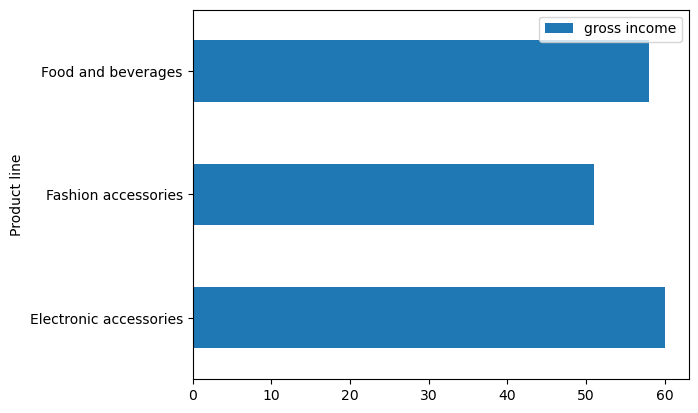

In [19]:
# 6. Tampilkan 3 produk tertinggi dari penjualan cabang yang diinputkan

# sort each branches
ba = df[df['Branch'] == 'A']
bb = df[df['Branch'] == 'B']
bc = df[df['Branch'] == 'C']

# get the 3 most sold items per branch 
ba_ms = ba.groupby('Product line')[['gross income']].count().reset_index()
bb_ms = bb.groupby('Product line')[['gross income']].count().reset_index()
bc_ms = bc.groupby('Product line')[['gross income']].count().reset_index()

# graph each branch 3 most sold item in barplot 
ba_ms = ba_ms.head(3)
bb_ms = bb_ms.head(3)
bc_ms = bc_ms.head(3)

# branch A top 3 most sold item 
ba_ms.plot(x="Product line", y="gross income", kind="barh")

<AxesSubplot:ylabel='Product line'>

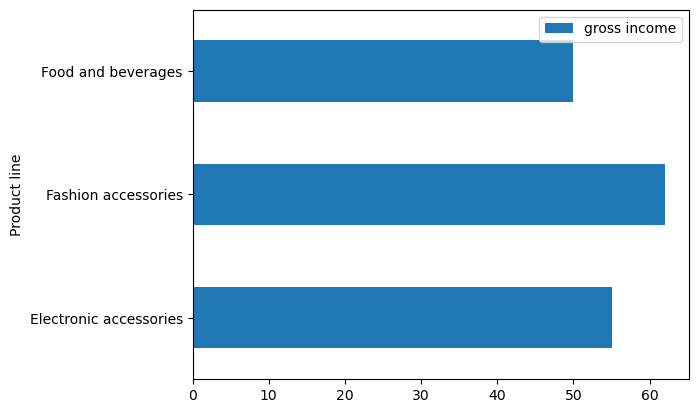

In [20]:
# branch B top 3 most sold item 
bb_ms.plot(x="Product line", y="gross income", kind="barh")

<AxesSubplot:ylabel='Product line'>

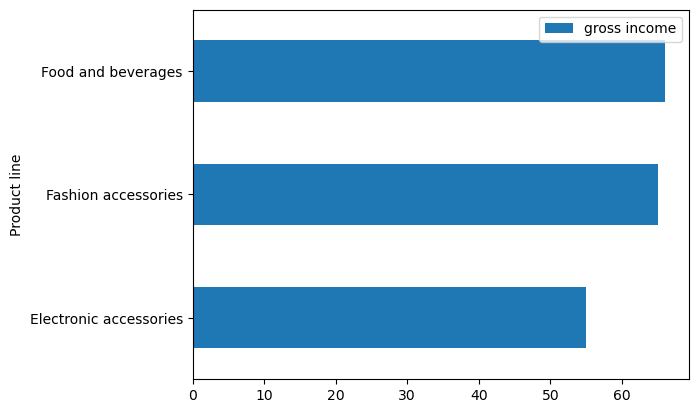

In [21]:
# branch C top 3 most sold item 
bc_ms.plot(x="Product line", y="gross income", kind="barh")

In [33]:
nama = ["budi", "andi", "lili", "lala", "susan", "lina", "santi", "dewi", "dwi", "michelle"]
umur = [25, 30, 22, 28, 30, 40, 35, 50, 40, 55]
gender = ["L", "L", "P", "P", "P", "P", "P", "P", "L", "P"]
pendapatan = [100, 200, 300, 1000, 200, 300, 500, 100, 200, 2000]
df = pd.DataFrame(zip(nama,umur,gender, pendapatan), columns=["nama", "umur", "jk", "pendapatan"])
df

,nama,umur,jk,pendapatan
0,budi,25,L,100
1,andi,30,L,200
2,lili,22,P,300
3,lala,28,P,1000
4,susan,30,P,200
5,lina,40,P,300
6,santi,35,P,500
7,dewi,50,P,100
8,dwi,40,L,200
9,michelle,55,P,2000


(array([1., 0., 1., 0., 0., 1., 0., 2., 0., 0., 0., 1., 0., 0., 0., 0., 2.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([22. , 23.1, 24.2, 25.3, 26.4, 27.5, 28.6, 29.7, 30.8, 31.9, 33. ,
        34.1, 35.2, 36.3, 37.4, 38.5, 39.6, 40.7, 41.8, 42.9, 44. , 45.1,
        46.2, 47.3, 48.4, 49.5, 50.6, 51.7, 52.8, 53.9, 55. ]),
 <BarContainer object of 30 artists>)

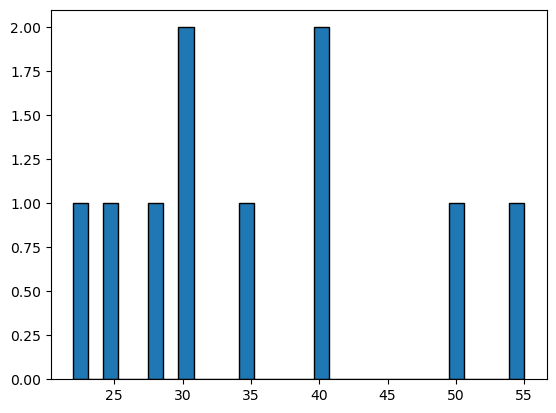

In [23]:
plt.hist(df['umur'], bins=30, edgecolor='black')

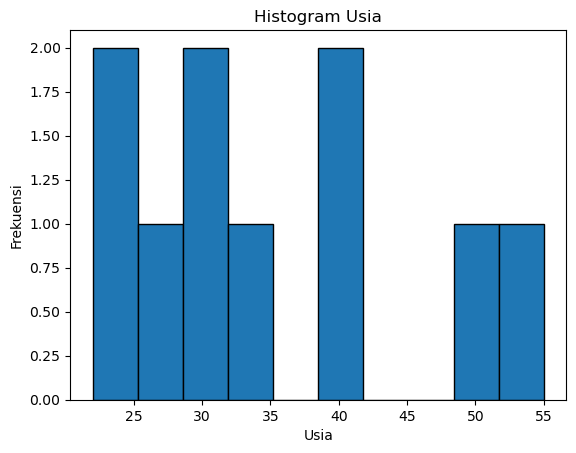

In [24]:
plt.hist(df['umur'], bins=10, edgecolor='black')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.title('Histogram Usia')
plt.show()

<AxesSubplot:>

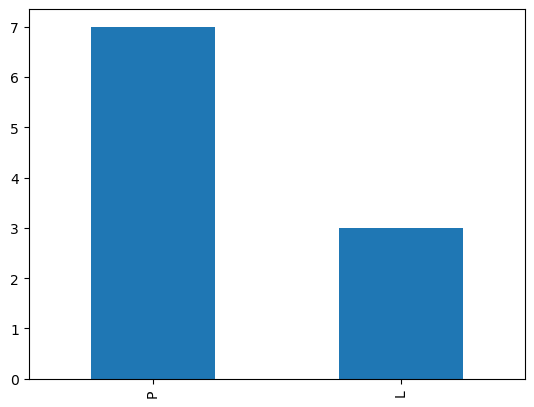

In [25]:
# Bar Chart

df['jk'].value_counts().plot(kind='bar')

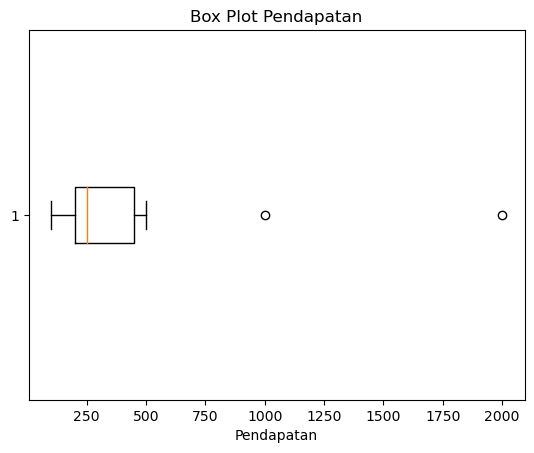

In [34]:
# Box Plot 

plt.boxplot(df['pendapatan'], vert=False)
plt.xlabel('Pendapatan')
plt.title('Box Plot Pendapatan')
plt.show()


In [35]:
# Pie Chart 
dfjk = df['jk'].value_counts()
dfjk

P    7
L    3
Name: jk, dtype: int64

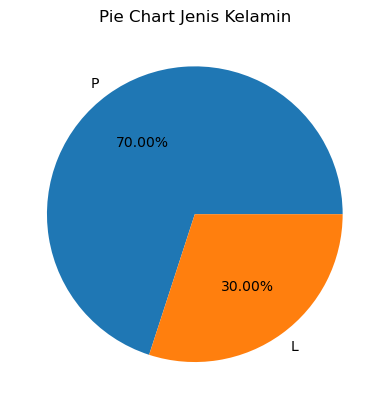

In [37]:
# plt.pie(dfjk, labels=dfjk.index, autopct='%1.1f%%')
plt.pie(dfjk, labels=dfjk.index, autopct='%1.2f%%')
plt.title('Pie Chart Jenis Kelamin')
plt.show()

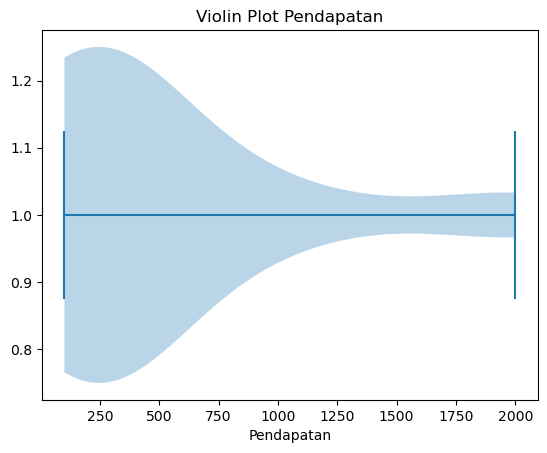

In [38]:
# Violin Plot 
plt.violinplot(dataset=df['pendapatan'], vert=False)
plt.xlabel('Pendapatan')
plt.title('Violin Plot Pendapatan')
plt.show()